In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import gc
import warnings
import time
warnings.filterwarnings("ignore")

import data_utils
import logging

%load_ext autoreload
%autoreload 2

logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.INFO)


In [6]:
data = data_utils.HomeCreditData()

ids, app_data, targets = data.load_application_data()
app_data.tail()

[autoreload of data_utils failed: Traceback (most recent call last):
  File "/Users/jetm/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jetm/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 385, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/jetm/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 324, in update_generic
    update(a, b)
  File "/Users/jetm/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 289, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/jetm/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 324, in update_generic
    update(a, b)
  File "/Users/jetm/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 267, in update_function
    setattr(old, name, getattr(new, name))
ValueErro

['../input/application_test.csv',
 '../input/HomeCredit_columns_description.csv',
 '../input/POS_CASH_balance.csv',
 '../input/credit_card_balance.csv',
 '../input/installments_payments.csv',
 '../input/application_train.csv',
 '../input/bureau.csv',
 '../input/previous_application.csv',
 '../input/bureau_balance.csv',
 '../input/sample_submission.csv']


INFO:Transforming application data
INFO:Fit row 0 with mean [170116.05986028] and variance [4.99551579e+10]
INFO:Fit row 1 with mean [587767.41375279] and variance [1.58900403e+11]
INFO:Fit row 2 with mean [27425.56065651] and variance [2.17055028e+08]
INFO:Fit row 3 with mean [528019.99780042] and variance [1.34003197e+11]
INFO:Fit row 4 with mean [0.02091703] and variance [0.00019363]
INFO:Fit row 5 with mean [-16041.24884142] and variance [18999118.80493175]
INFO:Fit row 6 with mean [64317.23141289] and variance [2.00804016e+10]
INFO:Fit row 7 with mean [-4983.59352723] and variance [12439475.31183892]
INFO:Fit row 8 with mean [-3002.07116251] and variance [2304019.21052585]
INFO:Fit row 9 with mean [12.02374105] and variance [141.15337723]
INFO:Fit row 10 with mean [0.50196472] and variance [0.0441187]
INFO:Fit row 11 with mean [0.51488998] and variance [0.03600615]
INFO:Fit row 12 with mean [0.5093502] and variance [0.03769065]
INFO:Fit row 13 with mean [0.118138] and variance [0.

INFO:Found 58 categories for column ORGANIZATION_TYPE
INFO:Transforming FONDKAPREMONT_MODE to onehot
INFO:No encoder, fitting one.
INFO:Discovered categories ['reg oper account' 'reg oper spec account' 'not specified'
 'org spec account'], with counts [85954 14070  6600  6539]
INFO:Found 4 categories for column FONDKAPREMONT_MODE
INFO:Transforming HOUSETYPE_MODE to onehot
INFO:No encoder, fitting one.
INFO:Discovered categories ['block of flats' 'specific housing' 'terraced house'], with counts [175162   1761   1416]
INFO:Found 3 categories for column HOUSETYPE_MODE
INFO:Transforming WALLSMATERIAL_MODE to onehot
INFO:No encoder, fitting one.
INFO:Discovered categories ['Panel' 'Stone, brick' 'Block' 'Wooden' 'Mixed' 'Monolithic' 'Others'], with counts [77309 75249 10681  6156  2649  2068  1909]
INFO:Found 7 categories for column WALLSMATERIAL_MODE
INFO:Transforming EMERGENCYSTATE_MODE to onehot
INFO:No encoder, fitting one.
INFO:Discovered categories ['No' 'Yes'], with counts [185607  

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE=Revolving loans,CODE_GENDER=F,CODE_GENDER=M,CODE_GENDER=XNA,FLAG_OWN_CAR=Y,FLAG_OWN_REALTY=N,NAME_TYPE_SUITE=Unaccompanied,NAME_TYPE_SUITE=Family,"NAME_TYPE_SUITE=Spouse, partner",NAME_TYPE_SUITE=Children,NAME_TYPE_SUITE=Other_B,NAME_TYPE_SUITE=Other_A,NAME_TYPE_SUITE=Group of people,NAME_INCOME_TYPE=Working,NAME_INCOME_TYPE=Commercial associate,NAME_INCOME_TYPE=Pensioner,NAME_INCOME_TYPE=State servant,NAME_INCOME_TYPE=Unemployed,NAME_INCOME_TYPE=Student,NAME_INCOME_TYPE=Businessman,NAME_INCOME_TYPE=Maternity leave,NAME_EDUCATION_TYPE=Secondary / secondary special,NAME_EDUCATION_TYPE=Higher education,NAME_EDUCATION_TYPE=Incomplete higher,NAME_EDUCATION_TYPE=Lower secondary,NAME_EDUCATION_TYPE=Academic degree,NAME_FAMILY_STATUS=Married,NAME_FAMILY_STATUS=Single / not married,NAME_FAMILY_STATUS=Civil marriage,NAME_FAMILY_STATUS=Separated,NAME_FAMILY_STATUS=Widow,NAME_FAMILY_STATUS=Unknown,NAME_HOUSING_TYPE=House / apartment,NAME_HOUSING_TYPE=With parents,NAME_HOUSING_TYPE=Municipal apartment,NAME_HOUSING_TYPE=Rented apartment,NAME_HOUSING_TYPE=Office apartment,NAME_HOUSING_TYPE=Co-op apartment,OCCUPATION_TYPE=Laborers,OCCUPATION_TYPE=Sales staff,OCCUPATION_TYPE=Core staff,OCCUPATION_TYPE=Managers,OCCUPATION_TYPE=Drivers,OCCUPATION_TYPE=High skill tech staff,OCCUPATION_TYPE=Accountants,OCCUPATION_TYPE=Medicine staff,OCCUPATION_TYPE=Security staff,OCCUPATION_TYPE=Cooking staff,OCCUPATION_TYPE=Cleaning staff,OCCUPATION_TYPE=Private service staff,OCCUPATION_TYPE=Low-skill Laborers,OCCUPATION_TYPE=Waiters/barmen staff,OCCUPATION_TYPE=Secretaries,OCCUPATION_TYPE=Realty agents,OCCUPATION_TYPE=HR staff,OCCUPATION_TYPE=IT staff,WEEKDAY_APPR_PROCESS_START=TUESDAY,WEEKDAY_APPR_PROCESS_START=WEDNESDAY,WEEKDAY_APPR_PROCESS_START=MONDAY,WEEKDAY_APPR_PROCESS_START=THURSDAY,WEEKDAY_APPR_PROCESS_START=FRIDAY,WEEKDAY_APPR_PROCESS_START=SATURDAY,WEEKDAY_APPR_PROCESS_START=SUNDAY,ORGANIZATION_TYPE=Business Entity Type 3,ORGANIZATION_TYPE=XNA,ORGANIZATION_TYPE=Self-employed,ORGANIZATION_TYPE=Other,ORGANIZATION_TYPE=Medicine,ORGANIZATION_TYPE=Business Entity Type 2,ORG

In [17]:
len(app_data.columns)

241

In [2]:
def plot_numerical_bylabel(data, col, size=[8, 4], bins=50):
    '''use this to compare the distribution of numercial features'''
    plt.figure(figsize=[12, 6])
    l1 = data.loc[data.TARGET==1, col]
    l0 = data.loc[data.TARGET==0, col]
    plt.subplot(1,2,1)
    sns.distplot(l1.dropna(), kde=True,bins=bins)
    plt.title('Default: Distribution of %s' % col)
    plt.subplot(1,2,2)
    sns.distplot(l0.dropna(), kde=True,bins=bins)
    plt.title('Non-default: Distribution of %s' % col)
    plt.show()


def plot_categorical_bylabel(data, col, size=[12 ,6], xlabel_angle=0, title=''):
    '''use it to compare the distribution between label 1 and label 0'''
    plt.figure(figsize = size)
    l1 = data.loc[data.TARGET==1, col].value_counts()
    l0 = data.loc[data.TARGET==0, col].value_counts()
    plt.subplot(1,2,1)
    sns.barplot(x = l1.index, y=l1.values)
    plt.title('Default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.subplot(1,2,2)
    sns.barplot(x = l0.index, y=l0.values)
    plt.title('Non-default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()



In [10]:
application_data = pd.read_csv("../input/application_train.csv")
cat = application_data.pop("NAME_TYPE_SUITE")
cat

0           Unaccompanied
1                  Family
2           Unaccompanied
3           Unaccompanied
4           Unaccompanied
5         Spouse, partner
6           Unaccompanied
7           Unaccompanied
8                Children
9           Unaccompanied
10          Unaccompanied
11               Children
12          Unaccompanied
13          Unaccompanied
14          Unaccompanied
15                 Family
16          Unaccompanied
17          Unaccompanied
18                Other_A
19          Unaccompanied
20          Unaccompanied
21          Unaccompanied
22          Unaccompanied
23          Unaccompanied
24          Unaccompanied
25          Unaccompanied
26          Unaccompanied
27                 Family
28          Unaccompanied
29          Unaccompanied
               ...       
307481             Family
307482      Unaccompanied
307483      Unaccompanied
307484      Unaccompanied
307485             Family
307486      Unaccompanied
307487      Unaccompanied
307488      

In [13]:
print(list(np.unique(cat.fillna("NaN"))))

['Children', 'Family', 'Group of people', 'NaN', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied']


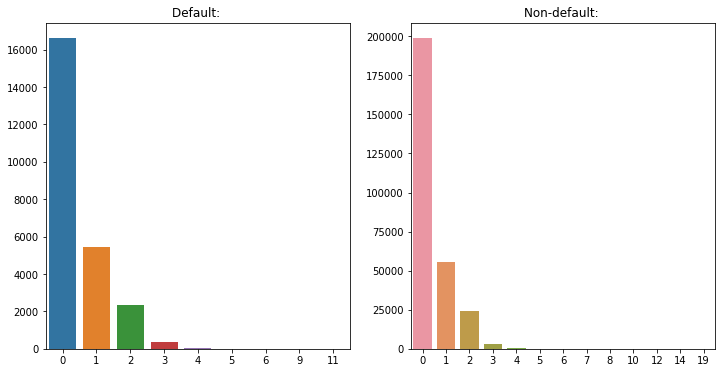

In [7]:
plot_categorical_bylabel(application_data, "CNT_CHILDREN")

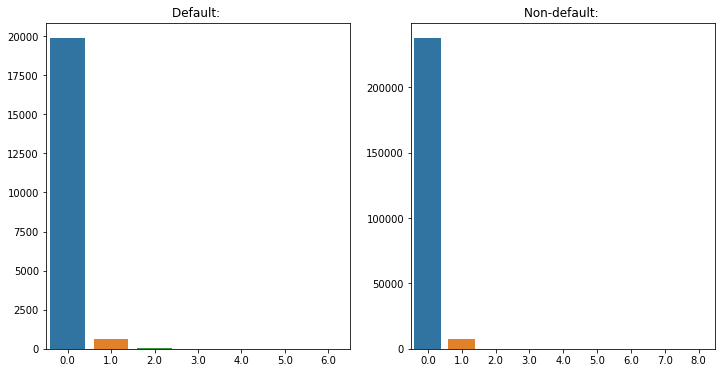

In [13]:
plot_categorical_bylabel(application_data, 'AMT_REQ_CREDIT_BUREAU_WEEK')
# plot_numerical_bylabel(application_data, 'AMT_REQ_CREDIT_BUREAU_HOUR')

NameError: name 'typeC' is not defined